# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Solana: Assessing the odds of SOL surviving the latest crypto bloodbath.  Solana [SOL] has emerged as one of the biggest losers from the 19 August bloodbath in the crypto market. The famed Ethereum [ETH] killer has now lost the highest value among top 10 cryptocurrencies per Coin Market Cap. The SOL token is currently down 21.6% over the past week as the market showed a sharp [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/solana-assessing-the-odds-of-sol-surviving-the-latest-crypto-bloodbath/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- U.S. Companies on Pace to Bring Home Record Number of Overseas Jobs.  After the Covid-19 pandemic upended supply chains, U.S. companies are bringing jobs and processes closer to home. ... [| Skaityti daugiau](https://www.wsj.com/articles/u-s-companies-on-pace-to-bring-home-record-number-of-overseas-jobs-11660968061?mod=hp_lead_pos4) 

### Kainų kaita pandemijos metu

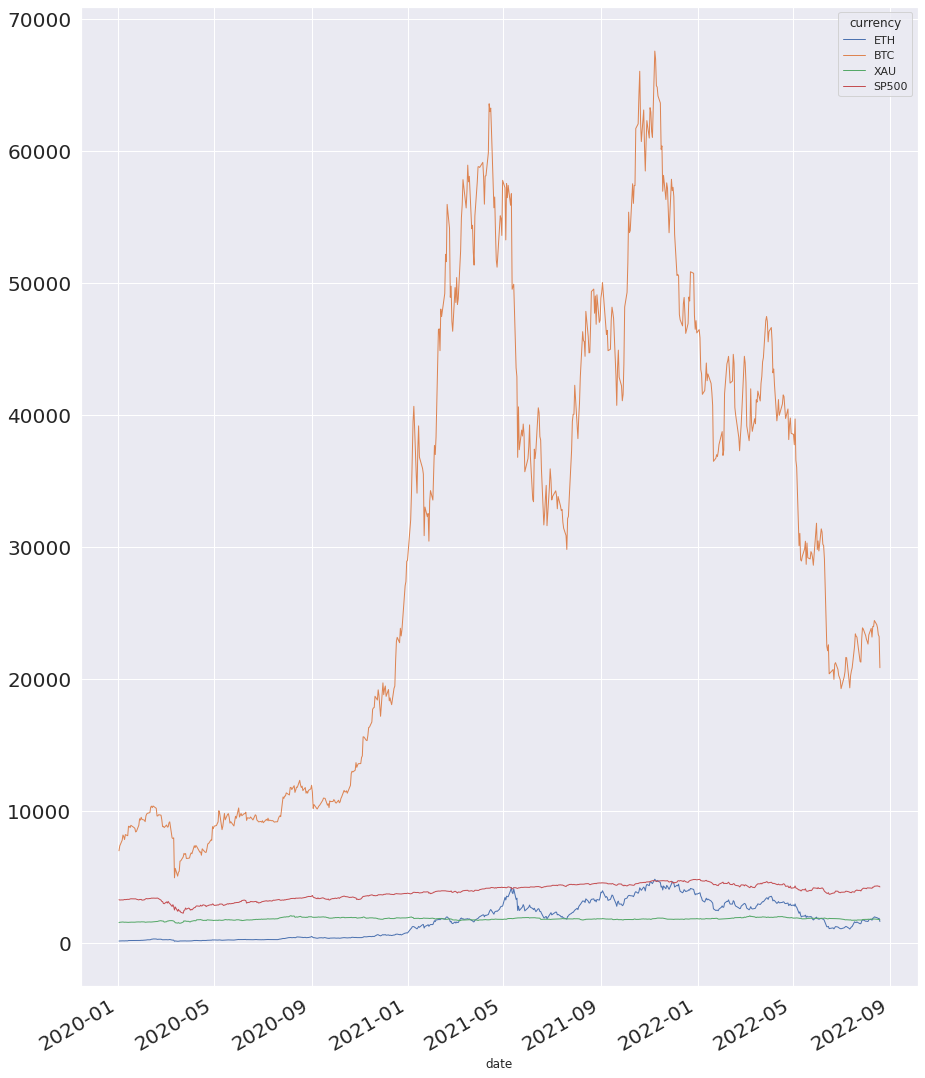

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.901029,0.248537,0.916445
BTC,0.901029,1.000000,0.202628,0.853473
XAU,0.248537,0.202628,1.000000,0.367542
SP500,0.916445,0.853473,0.367542,1.000000


In [8]:
#hide ### Koreliacijos matrica.

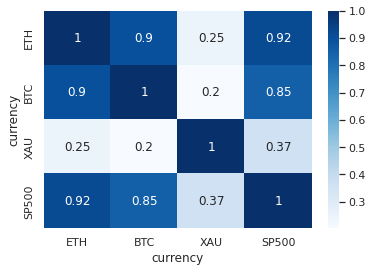

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')